In [820]:
#import 
import pandas as pd
import numpy as np
import statsmodels as sm
from statsmodels.api import formula

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms


from statsmodels.formula.api import ols
plt.style.use('seaborn')

In [821]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [822]:
df.shape

(21597, 21)

In [823]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [824]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [825]:
df.bedrooms.max(), df.bedrooms.idxmax() # idmax -> index (row number) of the house with max bedrooms

(33, 15856)

In [826]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [827]:
# df.drop(index=0) # temporary drop
#df.drop(index=0, inplace=True) # permanent drop
#df.head()
# # dropping a row
# use dr.drop(put row number, inplace=True)

In [828]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [829]:
#dropped all null values

df.dropna(axis=0, inplace=True)
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [830]:
df.drop(index=df["sqft_lot"].idxmax(), inplace=True)
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576100e+04,1.576100e+04,15761.000000,15761.000000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,4.593591e+09,5.413071e+05,3.378910,2.120868,2084.562147,1.517702e+04,1.495178,0.007614,0.229808,3.410824,7.663854,1792.806738,1971.114460,82.445467,98077.561766,47.559198,-122.213532,1990.183427,12874.231902
std,2.876029e+09,3.722355e+05,0.935318,0.766744,918.625573,3.974178e+04,0.539354,0.086927,0.761029,0.651965,1.172201,828.420483,29.334929,397.224684,53.414767,0.138609,0.140703,684.149144,27784.315897
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125400e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.601000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1845.000000,7620.000000
75%,7.334501e+09,6.445000e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10106.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [831]:
# remove the 33 bedroom house
# use .drop()
#df.drop(index=df["bedrooms"].idxmax(), inplace=True)
#df.describe()
df.drop(df[df.bedrooms > 30].index, inplace=True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576000e+04,1.576000e+04,15760.000000,15760.000000,15760.000000,1.576000e+04,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000,15760.00000,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000,15760.000000
mean,4.593730e+09,5.413008e+05,3.377030,2.120891,2084.591624,1.517760e+04,1.495209,0.007614,0.229822,3.410723,7.663896,1792.854505,1971.11599,82.450698,98077.560152,47.559189,-122.213524,1990.225317,12874.750571
std,2.876067e+09,3.722465e+05,0.905094,0.766763,918.647265,3.974297e+04,0.539357,0.086929,0.761051,0.651862,1.172226,828.425061,29.33523,397.236744,53.416077,0.138609,0.140704,684.150637,27785.121117
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.00000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125320e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.00000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.00000,0.000000,98065.000000,47.571000,-122.229000,1846.000000,7620.000000
75%,7.334526e+09,6.446250e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.00000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10106.500000
max,9.895000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.00000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [832]:
# slice
df2 = df[df.waterfront==0]
df2.head()

df3 = df[df.waterfront==1]
df3.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508


{'whiskers': [<matplotlib.lines.Line2D at 0x1c37146ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c371348d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c371468d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42130c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42130278>],
 'means': []}

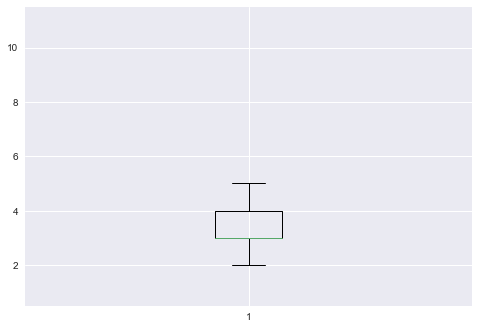

In [833]:
plt.boxplot(df['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c42117400>,
 'caps': [<matplotlib.lines.Line2D at 0x1c369aa550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c42117550>],
 'medians': [<matplotlib.lines.Line2D at 0x1c36191630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c361919e8>],
 'means': []}

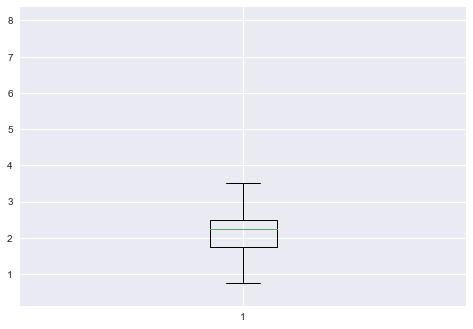

In [834]:
plt.boxplot(df['bathrooms'])


(array([1.205e+03, 4.825e+03, 4.676e+03, 2.817e+03, 1.321e+03, 5.390e+02,
        2.230e+02, 8.300e+01, 3.400e+01, 1.600e+01, 1.000e+01, 6.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  370. ,  1028.5,  1687. ,  2345.5,  3004. ,  3662.5,  4321. ,
         4979.5,  5638. ,  6296.5,  6955. ,  7613.5,  8272. ,  8930.5,
         9589. , 10247.5, 10906. , 11564.5, 12223. , 12881.5, 13540. ]),
 <a list of 20 Patch objects>)

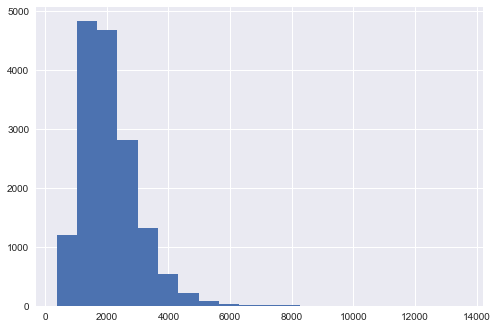

In [835]:
plt.hist(df["sqft_living"],bins=20)

(array([1.410e+02, 0.000e+00, 2.003e+03, 0.000e+00, 7.120e+03, 0.000e+00,
        5.078e+03, 0.000e+00, 1.183e+03, 0.000e+00, 1.920e+02, 0.000e+00,
        2.300e+01, 0.000e+00, 1.000e+01, 0.000e+00, 6.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <a list of 20 Patch objects>)

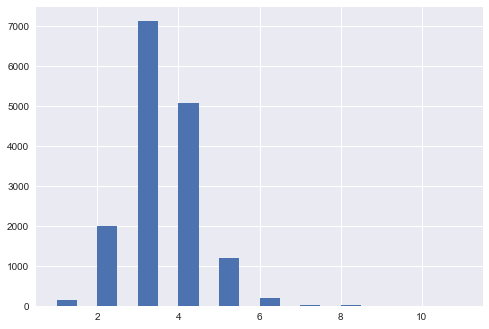

In [836]:
plt.hist(df.bedrooms.dropna(), bins=20)

In [837]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [838]:
df.bedrooms.value_counts()

3     7120
4     5078
2     2003
5     1183
6      192
1      141
7       23
8       10
9        6
10       3
11       1
Name: bedrooms, dtype: int64

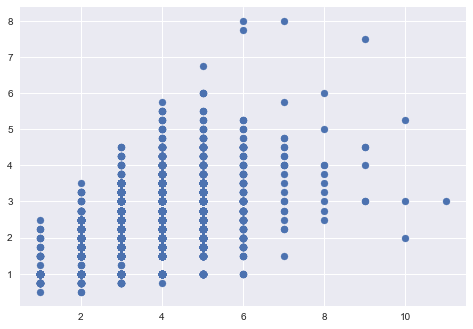

In [839]:
import matplotlib.pyplot as plt
plt.scatter(df.bedrooms, df.bathrooms)

In [840]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015138,0.009705,0.005431,-0.008348,-0.139627,0.020424,-0.001527,0.014919,-0.023152,0.008557,-0.009246,0.023659,-0.010226,-0.007464,-0.005110,0.019771,0.000916,-0.141104
price,-0.015138,1.000000,0.315138,0.526247,0.706249,0.087823,0.259561,0.274218,0.396940,0.034309,0.664249,0.612073,0.049412,0.122741,-0.049485,0.306720,0.021194,0.581600,0.079560
bedrooms,0.009705,0.315138,1.000000,0.530480,0.593862,0.026377,0.188477,-0.005842,0.083776,0.015647,0.367355,0.492064,0.160155,0.018453,-0.153130,-0.007940,0.135382,0.405775,0.026206
bathrooms,0.005431,0.526247,0.530480,1.000000,0.753832,0.088391,0.505139,0.065682,0.181341,-0.130166,0.664698,0.685671,0.504752,0.046966,-0.199730,0.029747,0.222890,0.569410,0.083931
sqft_living,-0.008348,0.706249,0.593862,0.753832,1.000000,0.176229,0.359359,0.111487,0.285823,-0.062207,0.764236,0.876174,0.314146,0.050216,-0.196593,0.058309,0.239594,0.756753,0.178855
sqft_lot,-0.139627,0.087823,0.026377,0.088391,0.176229,1.000000,-0.008059,0.027571,0.071633,-0.019205,0.118367,0.184893,0.058826,0.002799,-0.133561,-0.082546,0.240246,0.150830,0.722610
floors,0.020424,0.259561,0.188477,0.505139,0.359359,-0.008059,1.000000,0.018372,0.027726,-0.260888,0.459786,0.529061,0.486986,-0.000744,-0.058168,0.058121,0.129817,0.282004,-0.012819
waterfront,-0.001527,0.274218,-0.005842,0.065682,0.111487,0.027571,0.018372,1.000000,0.409966,0.016476,0.083029,0.077159,-0.024085,0.087798,0.030390,-0.015946,-0.042324,0.090592,0.029924
view,0.014919,0.396940,0.083776,0.181341,0.285823,0.071633,0.027726,0.409966,1.000000,0.046221,0.249120,0.170925,-0.056289,0.098472,0.086768,0.008973,-0.078868,0.277699,0.068589
condition,-0.023152,0.034309,0.015647,-0.130166,-0.062207,-0.019205,-0.260888,0.016476,0.046221,1.000000,-0.147684,-0.157823,-0.366833,-0.060814,0.001671,-0.022268,-0.105803,-0.096260,-0.005982


{'whiskers': [<matplotlib.lines.Line2D at 0x1c35749198>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2c4a3518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c35749748>],
 'medians': [<matplotlib.lines.Line2D at 0x1c420b0a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c420b00f0>],
 'means': []}

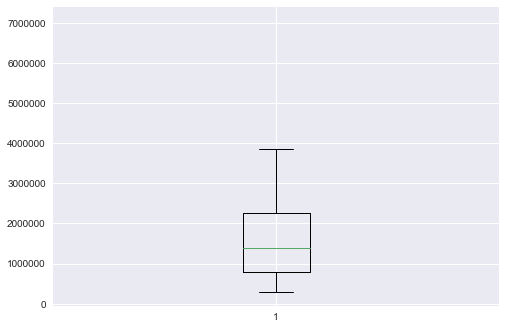

In [841]:
plt.boxplot(df[df.waterfront==1]['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c34a15710>,
 'caps': [<matplotlib.lines.Line2D at 0x1c349f9438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c34a15e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c349f9908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c349f9828>],
 'means': []}

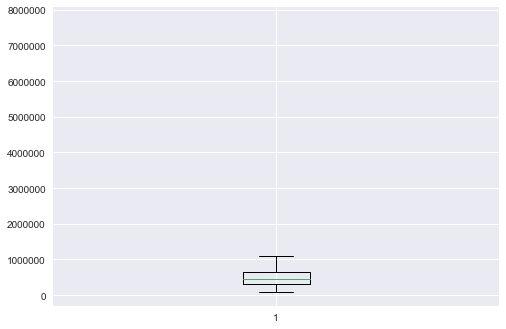

In [842]:
plt.boxplot(df[df.waterfront==0]['price'])

Text(0.5,1,'Linearity check')

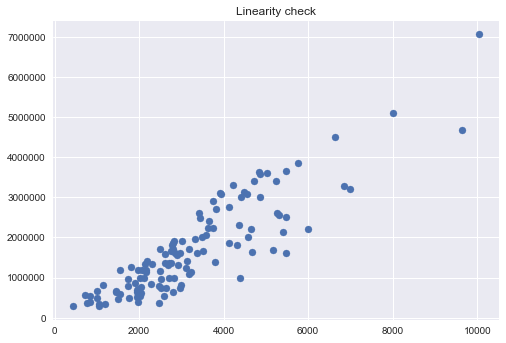

In [843]:
plt.scatter(df3.sqft_living, df3.price)
plt.title("Linearity check")


# Model 1: Sqft Living vs Price on waterfront 

In [844]:
f = 'price~sqft_living'

In [845]:
model = ols(formula=f, data=df3).fit()

In [846]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     433.1
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.67e-41
Time:                        17:20:47   Log-Likelihood:                -1753.6
No. Observations:                 120   AIC:                             3511.
Df Residuals:                     118   BIC:                             3517.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.575e+05   1.07e+05     -2.417      0.017   -4.69e+05   -4.65e+04
sqft_living   603.6493     29.008     20.810      0.000     546.206     661.092
==============================================================================
Omnibus:                        1.042   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                1.094
Skew:                          -0.215   Prob(JB):                        0.579
Kurtosis:                       2.816   Cond. No.                     7.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2 log sqft_living vs price on waterfront 

In [847]:
# how to make a column
df3['log_sqft_living'] = np.log(df3['sqft_living'])
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [848]:
f = 'price~log_sqft_living'
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     218.2
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.35e-28
Time:                        17:20:50   Log-Likelihood:                -1783.3
No. Observations:                 120   AIC:                             3571.
Df Residuals:                     118   BIC:                             3576.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.181e+07   9.17e+05    -12.875      0.000   -1.36e+07   -9.99e+06
log_sqft_living    1.7e+06   1.15e+05     14.771      0.000    1.47e+06    1.93e+06
==============================================================================
Omnibus:                       29.022   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.806
Skew:                           0.997   Prob(JB):                     1.70e-13
Kurtosis:                       5.790   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3: sqft_living vs price no waterfront 

Text(0.5,1,'Linearity check')

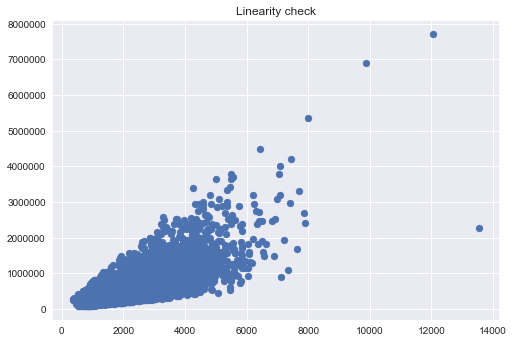

In [849]:
plt.scatter(df2.sqft_living, df2.price)
plt.title("Linearity check")


In [850]:
f = 'price~sqft_living'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.536e+04
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:20:52   Log-Likelihood:            -2.1626e+05
No. Observations:               15640   AIC:                         4.325e+05
Df Residuals:                   15638   BIC:                         4.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.458e+04   4901.543     -5.014      0.000   -3.42e+04    -1.5e+04
sqft_living   268.3235      2.165    123.937      0.000     264.080     272.567
==============================================================================
Omnibus:                    10512.790   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432437.801
Skew:                           2.693   Prob(JB):                         0.00
Kurtosis:                      28.191   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model: log sqrt_living vs price

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([6.000e+00, 1.300e+01, 3.100e+01, 1.850e+02, 4.650e+02, 8.210e+02,
        1.462e+03, 2.065e+03, 2.420e+03, 2.565e+03, 2.280e+03, 1.683e+03,
        9.710e+02, 4.460e+02, 1.500e+02, 5.600e+01, 1.700e+01, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([5.91350301, 6.09349803, 6.27349306, 6.45348809, 6.63348311,
        6.81347814, 6.99347317, 7.17346819, 7.35346322, 7.53345825,
        7.71345328, 7.8934483 , 8.07344333, 8.25343836, 8.43343338,
        8.61342841, 8.79342344, 8.97341847, 9.15341349, 9.33340852,
        9.51340355]),
 <a list of 20 Patch objects>)

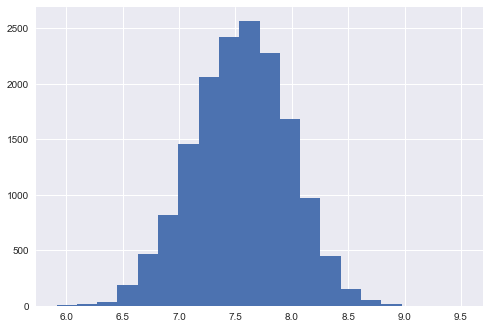

In [851]:
df2['log_sqft_living'] = np.log(df2['sqft_living'])
df.head()
plt.hist(df2["log_sqft_living"],bins=20)

In [852]:
f = 'price~log_sqft_living'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     9625.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:20:54   Log-Likelihood:            -2.1785e+05
No. Observations:               15640   AIC:                         4.357e+05
Df Residuals:                   15638   BIC:                         4.357e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.282e+06   3.89e+04    -84.286      0.000   -3.36e+06   -3.21e+06
log_sqft_living  5.052e+05   5149.526     98.109      0.000    4.95e+05    5.15e+05
==============================================================================
Omnibus:                    13920.640   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1394040.935
Skew:                           3.854   Prob(JB):                         0.00
Kurtosis:                      48.604   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model: price vs sqft_above on waterfront


Text(0.5,1,'Linearity check')

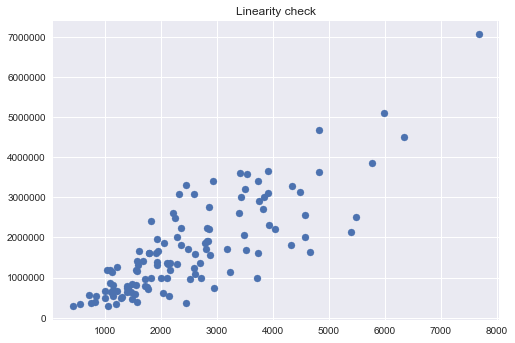

In [853]:
plt.scatter(df3.sqft_above, df3.price)
plt.title("Linearity check")

In [854]:
f = 'price~sqft_above'
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     235.3
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           7.08e-30
Time:                        17:20:54   Log-Likelihood:                -1780.3
No. Observations:                 120   AIC:                             3565.
Df Residuals:                     118   BIC:                             3570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.624e+04   1.32e+05     -0.579      0.564   -3.37e+05    1.84e+05
sqft_above   706.7574     46.071     15.340      0.000     615.523     797.991
==============================================================================
Omnibus:                        1.151   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.706
Skew:                           0.129   Prob(JB):                        0.702
Kurtosis:                       3.273   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Heat Map

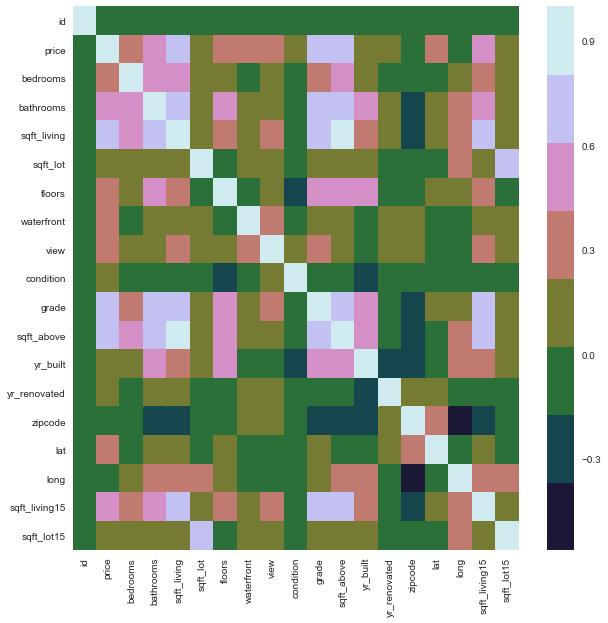

In [855]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap=sns.color_palette("cubehelix", 8))

# Model 3 bedrooms vs price on waterfront 


Text(0.5,1,'Linearity check')

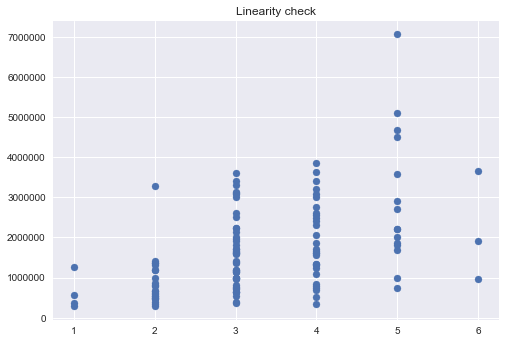

In [856]:
plt.scatter(df3.bedrooms,df3.price)
plt.title("Linearity check")

In [857]:
f = 'price~bedrooms'

In [858]:
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     37.10
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.44e-08
Time:                        17:20:56   Log-Likelihood:                -1829.7
No. Observations:                 120   AIC:                             3663.
Df Residuals:                     118   BIC:                             3669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.363e+04   2.97e+05     -0.046      0.964   -6.03e+05    5.75e+05
bedrooms    5.187e+05   8.51e+04      6.091      0.000     3.5e+05    6.87e+05
==============================================================================
Omnibus:                       28.994   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.983
Skew:                           1.080   Prob(JB):                     1.40e-11
Kurtosis:                       5.308   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 4 log of bedroom vs price on waterfront 

In [859]:
df3['log_bedrooms'] = np.log(df3['bedrooms'])
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [860]:
f = 'price~log_bedrooms'
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     34.92
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           3.40e-08
Time:                        17:20:58   Log-Likelihood:                -1830.5
No. Observations:                 120   AIC:                             3665.
Df Residuals:                     118   BIC:                             3671.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8039.5169   3.05e+05     -0.026      0.979   -6.12e+05    5.96e+05
log_bedrooms  1.508e+06   2.55e+05      5.909      0.000       1e+06    2.01e+06
==============================================================================
Omnibus:                       33.257   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.478
Skew:                           1.191   Prob(JB):                     2.71e-14
Kurtosis:                       5.612   Cond. No.                         6.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 5: bathroom vs price on waterfront 

Text(0.5,1,'Linearity check')

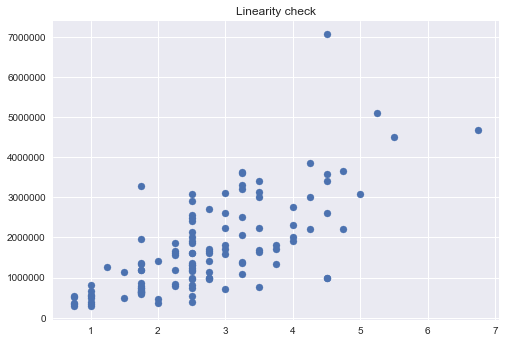

In [861]:
plt.scatter(df3.bathrooms, df3.price)
plt.title("Linearity check")

In [862]:
f = 'price~bathrooms'
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     123.6
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           4.38e-20
Time:                        17:20:59   Log-Likelihood:                -1803.1
No. Observations:                 120   AIC:                             3610.
Df Residuals:                     118   BIC:                             3616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.625e+05   1.92e+05     -1.365      0.175   -6.43e+05    1.18e+05
bathrooms   7.304e+05   6.57e+04     11.119      0.000       6e+05     8.6e+05
==============================================================================
Omnibus:                       38.028   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.348
Skew:                           1.107   Prob(JB):                     1.21e-26
Kurtosis:                       7.355   Cond. No.                         8.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 6: log_bathroom vs price on waterfront 

In [863]:
df['log_bathrooms'] = np.log(df3['bathrooms'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_bathrooms
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,NaN
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,NaN
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,NaN
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,NaN
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,NaN


# Model: Grade vs price waterfront

Text(0.5,1,'Linearity check')

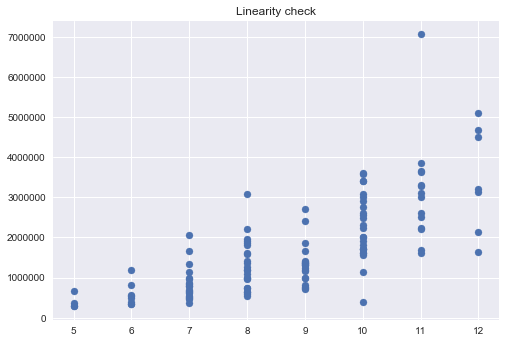

In [864]:
plt.scatter(df3.grade,df3.price)
plt.title("Linearity check")

In [865]:
f = 'price~grade'
model = ols(formula=f, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     136.6
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.97e-21
Time:                        17:21:01   Log-Likelihood:                -1800.0
No. Observations:                 120   AIC:                             3604.
Df Residuals:                     118   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.528e+06    3.7e+05     -6.840      0.000   -3.26e+06    -1.8e+06
grade       4.826e+05   4.13e+04     11.686      0.000    4.01e+05    5.64e+05
==============================================================================
Omnibus:                       50.273   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.953
Skew:                           1.388   Prob(JB):                     1.56e-46
Kurtosis:                       8.872   Cond. No.                         46.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [866]:
df2.head()
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living
count,1.564000e+04,1.564000e+04,15640.000000,15640.000000,15640.000000,1.564000e+04,15640.000000,15640.0,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000,15640.000000
mean,4.594114e+09,5.323599e+05,3.377494,2.116480,2075.620844,1.508162e+04,1.494341,0.0,0.202494,3.409783,7.655371,1787.255627,1971.177877,79.395844,98077.417967,47.559383,-122.213003,1984.796547,12801.923785,7.550028
std,2.876111e+09,3.446431e+05,0.903464,0.761546,904.152868,3.965266e+04,0.539017,0.0,0.695077,0.651043,1.162440,820.751667,29.345238,390.154437,53.346015,0.138792,0.140683,680.305920,27829.057372,0.421072
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,5.913503
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1430.000000,5.038000e+03,1.000000,0.0,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98032.000000,47.469375,-122.327000,1490.000000,5100.000000,7.265430
50%,3.905082e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.570000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571400,-122.228000,1840.000000,7600.000000,7.554859
75%,7.334501e+09,6.390000e+05,4.000000,2.500000,2550.000000,1.058500e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98117.000000,47.677800,-122.124000,2360.000000,10050.000000,7.843849
max,9.895000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.164794e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,9.513404


# Heatmap for non-waterfront properties

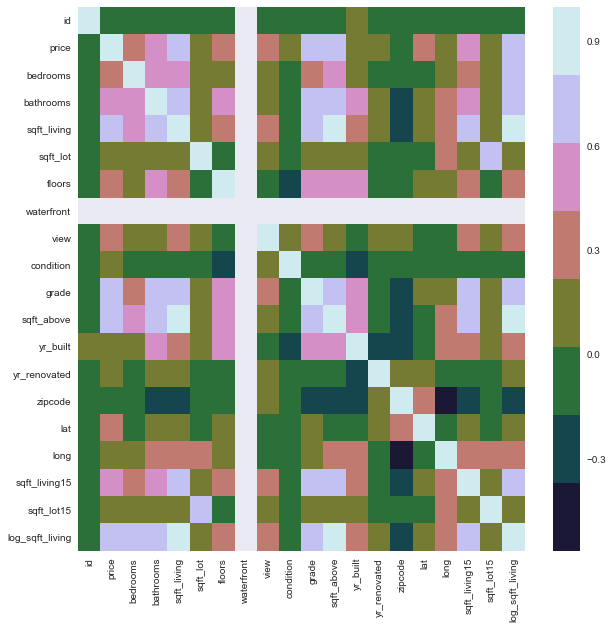

In [867]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr(), cmap=sns.color_palette("cubehelix", 8))

# Model: Bathroom vs price non waterfront

Text(0.5,1,'Linearity check')

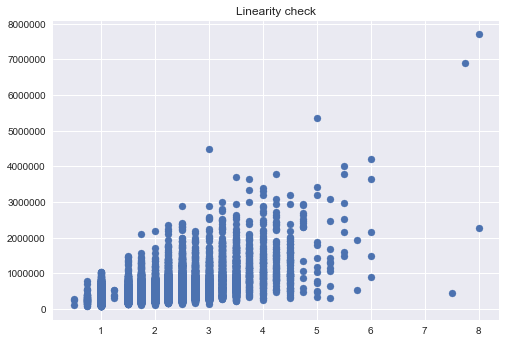

In [868]:
plt.scatter(df2.bathrooms, df2.price)
plt.title("Linearity check")

In [869]:
f = 'price~bathrooms'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     6087.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:21:05   Log-Likelihood:            -2.1904e+05
No. Observations:               15640   AIC:                         4.381e+05
Df Residuals:                   15638   BIC:                         4.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e+04   6906.329      3.673      0.000    1.18e+04    3.89e+04
bathrooms   2.395e+05   3070.419     78.017      0.000    2.34e+05    2.46e+05
==============================================================================
Omnibus:                    11888.698   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           588552.638
Skew:                           3.194   Prob(JB):                         0.00
Kurtosis:                      32.365   Cond. No.                         7.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Linearity check')

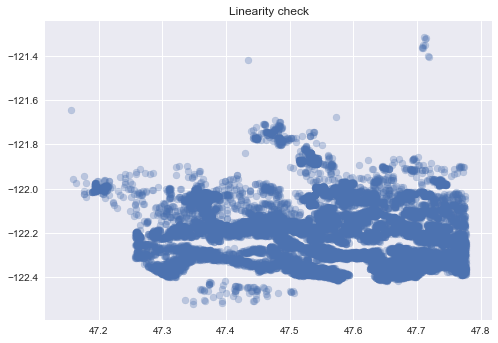

In [870]:
plt.scatter(df2.lat, df2.long, alpha=.3)
plt.title("Linearity check")

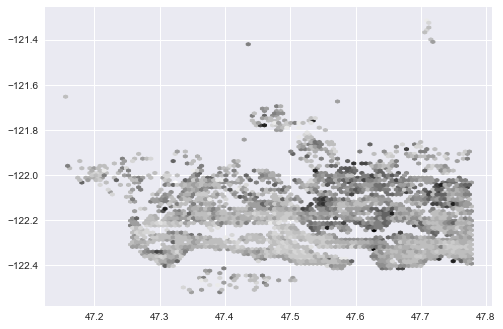

In [871]:
plt.hexbin(x=df2.lat, y=df2.long, C=df2.grade, bins=20)
plt.show()

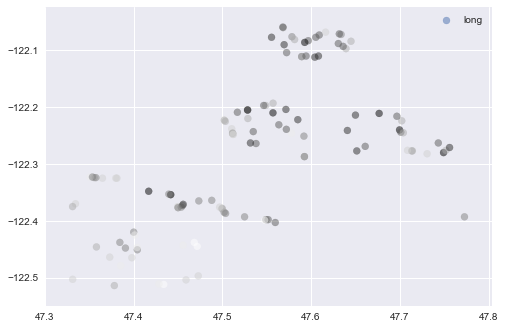

In [872]:
plt.scatter(df3.lat, df3.long, alpha=0.5, c=df3.grade)
plt.legend()

In [873]:
f = 'price~floors'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1226.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          1.39e-258
Time:                        17:21:08   Log-Likelihood:            -2.2102e+05
No. Observations:               15640   AIC:                         4.420e+05
Df Residuals:                   15638   BIC:                         4.421e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.748e+05   7821.670     35.130      0.000    2.59e+05     2.9e+05
floors      1.724e+05   4923.695     35.009      0.000    1.63e+05    1.82e+05
==============================================================================
Omnibus:                    13661.984   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           938072.892
Skew:                           3.875   Prob(JB):                         0.00
Kurtosis:                      40.141   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     1911.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:21:08   Log-Likelihood:            -2.2070e+05
No. Observations:               15640   AIC:                         4.414e+05
Df Residuals:                   15638   BIC:                         4.414e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.072e+05   1.01e+04     10.644      0.000    8.74e+04    1.27e+05
bedrooms    1.259e+05   2879.573     43.719      0.000     1.2e+05    1.32e+05
==============================================================================
Omnibus:                    13315.399   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           874552.442
Skew:                           3.728   Prob(JB):                         0.00
Kurtosis:                      38.867   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

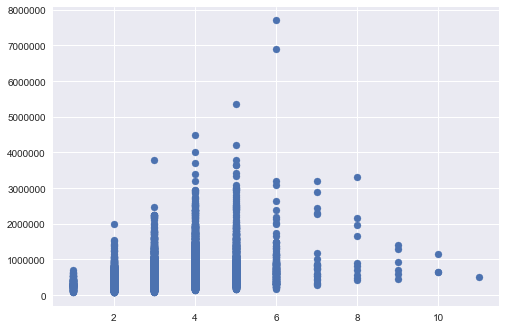

In [874]:

plt.scatter(df2.bedrooms, df2.price)
f = 'price~bedrooms'
model = ols(formula=f, data=df2).fit()
model.summary()

In [875]:
df4 = df2[df2.lat>47.3]
df4.head()

df5 = df2[df2.lat<=47.3]
df5.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living
86,2599001200,11/3/2014,305000.0,5,2.25,2660,8400,1.5,0.0,0.0,...,2660,0.0,1961,0.0,98092,47.2909,-122.189,1590,8165,7.886081
90,2791500270,5/22/2014,243500.0,4,2.50,1980,7403,2.0,0.0,0.0,...,1980,0.0,1988,0.0,98023,47.2897,-122.372,1980,7510,7.590852
130,3668000070,1/5/2015,212000.0,3,1.75,1060,7875,1.0,0.0,0.0,...,1060,0.0,1986,0.0,98092,47.2761,-122.152,1420,7680,6.966024
158,8029200135,11/13/2014,247000.0,3,2.00,1270,7198,1.5,0.0,0.0,...,1270,0.0,1916,2013.0,98022,47.2086,-121.996,1160,7198,7.146772
178,5437810320,11/17/2014,269950.0,3,1.50,1950,7560,1.0,0.0,2.0,...,1320,630.0,1975,0.0,98022,47.1976,-121.999,1950,8941,7.575585


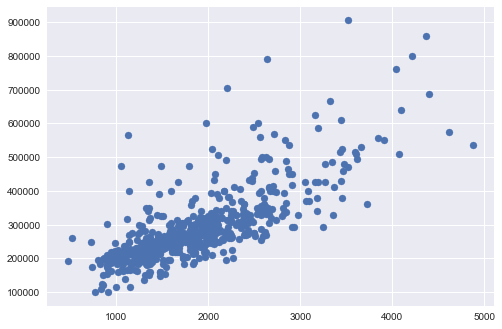

In [876]:
plt.scatter(df5.sqft_living,df5.price)

In [877]:
f = 'price~sqft_living'
model = ols(formula=f, data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     805.3
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          7.44e-113
Time:                        17:21:09   Log-Likelihood:                -7549.2
No. Observations:                 600   AIC:                         1.510e+04
Df Residuals:                     598   BIC:                         1.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.883e+04   8372.278      8.222      0.000    5.24e+04    8.53e+04
sqft_living   118.4802      4.175     28.377      0.000     110.280     126.680
==============================================================================
Omnibus:                      285.628   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1832.052
Skew:                           2.030   Prob(JB):                         0.00
Kurtosis:                      10.536   Cond. No.                     5.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

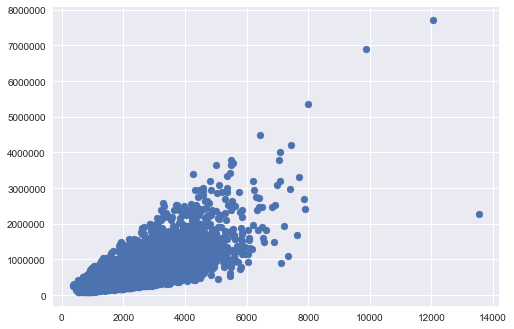

In [878]:
plt.scatter(df4.sqft_living,df4.price)

In [879]:
f = 'price~sqft_living'
model = ols(formula=f, data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     805.3
Date:                Thu, 20 Dec 2018   Prob (F-statistic):          7.44e-113
Time:                        17:21:10   Log-Likelihood:                -7549.2
No. Observations:                 600   AIC:                         1.510e+04
Df Residuals:                     598   BIC:                         1.511e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.883e+04   8372.278      8.222      0.000    5.24e+04    8.53e+04
sqft_living   118.4802      4.175     28.377      0.000     110.280     126.680
==============================================================================
Omnibus:                      285.628   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1832.052
Skew:                           2.030   Prob(JB):                         0.00
Kurtosis:                      10.536   Cond. No.                     5.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Finding correlations between values other than price not on water

In [880]:
df2_pred= df2.iloc[:,3:21]
df2_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


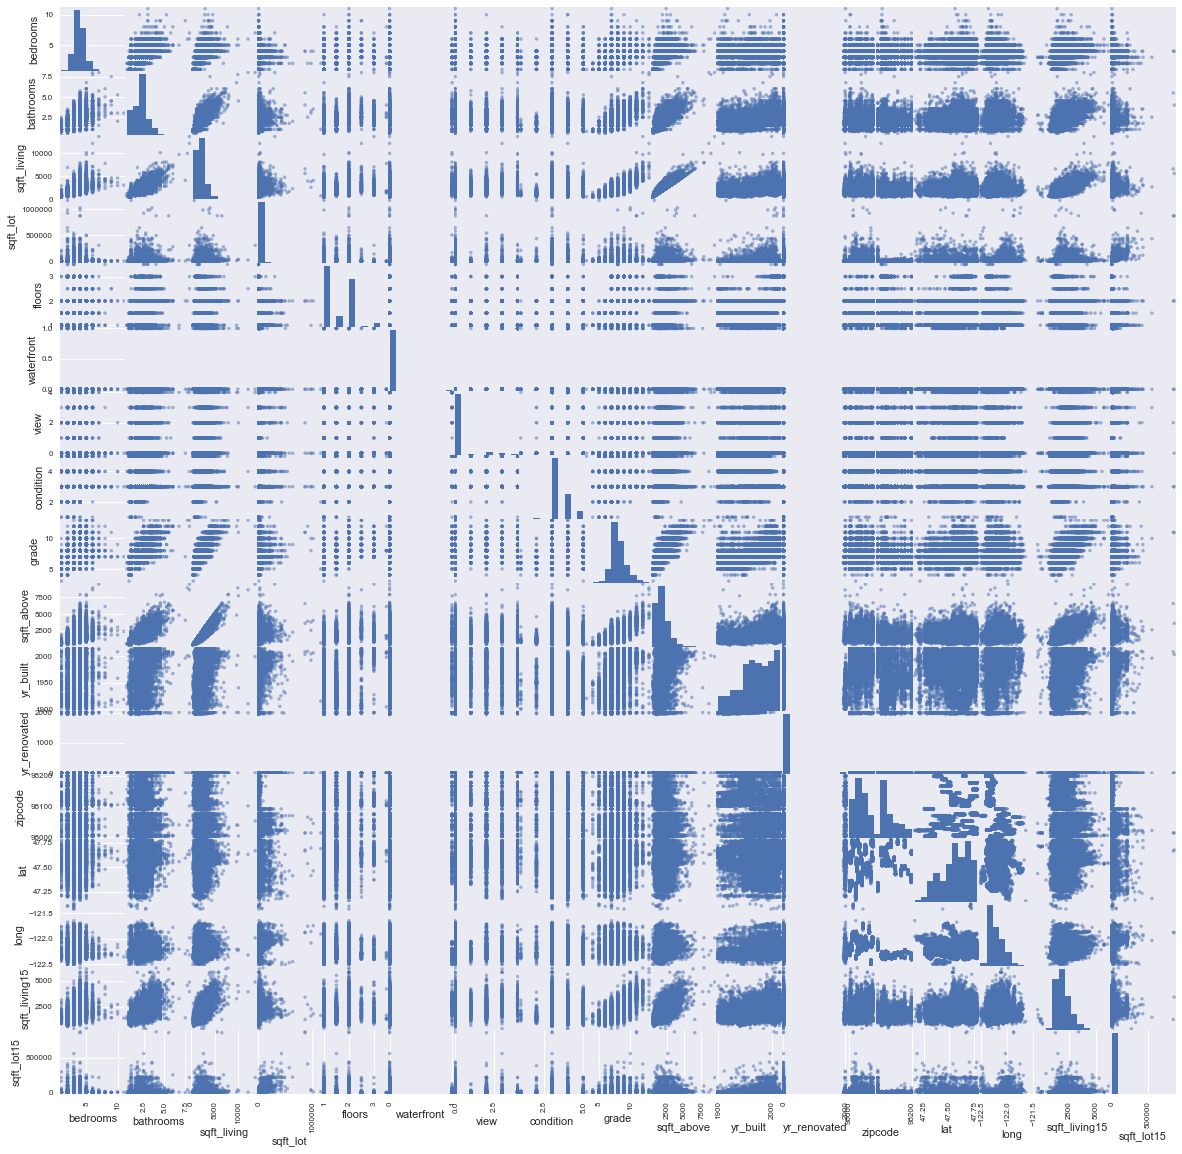

In [881]:
pd.plotting.scatter_matrix(df_pred,figsize  = [20, 20]);

In [882]:
df2_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.530879,0.600095,0.027060,0.188081,NaN,0.094439,0.017681,0.368457,0.493882,0.159789,0.019209,-0.153882,-0.010853,0.133326,0.407031,0.027378
bathrooms,0.530879,1.000000,0.752854,0.087981,0.506427,NaN,0.170188,-0.131519,0.662149,0.683178,0.508670,0.040907,-0.202062,0.027516,0.224901,0.567071,0.084212
sqft_living,0.600095,0.752854,1.000000,0.177647,0.361327,NaN,0.268498,-0.062605,0.762195,0.875697,0.318516,0.041594,-0.200646,0.056315,0.244416,0.757119,0.180212
sqft_lot,0.027060,0.087981,0.177647,1.000000,-0.007304,NaN,0.069044,-0.020564,0.118870,0.186095,0.060542,0.001625,-0.135441,-0.081464,0.246429,0.151507,0.725970
floors,0.188081,0.506427,0.361327,-0.007304,1.000000,NaN,0.021747,-0.261973,0.460404,0.529827,0.488178,-0.002329,-0.058192,0.057175,0.129611,0.282103,-0.012789
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.094439,0.170188,0.268498,0.069044,0.021747,NaN,1.000000,0.044400,0.238163,0.154761,-0.051977,0.070171,0.080923,0.016281,-0.069413,0.265914,0.063978
condition,0.017681,-0.131519,-0.062605,-0.020564,-0.261973,NaN,0.044400,1.000000,-0.149826,-0.158874,-0.367865,-0.062204,0.002431,-0.021457,-0.104633,-0.097951,-0.007359
grade,0.368457,0.662149,0.762195,0.118870,0.460404,NaN,0.238163,-0.149826,1.000000,0.756966,0.445472,0.006983,-0.187127,0.116714,0.202877,0.715579,0.118542
sqft_above,0.493882,0.683178,0.875697,0.186095,0.529827,NaN,0.154761,-0.158874,0.756966,1.000000,0.423018,0.011874,-0.261826,0.006458,0.347503,0.733415,0.187926


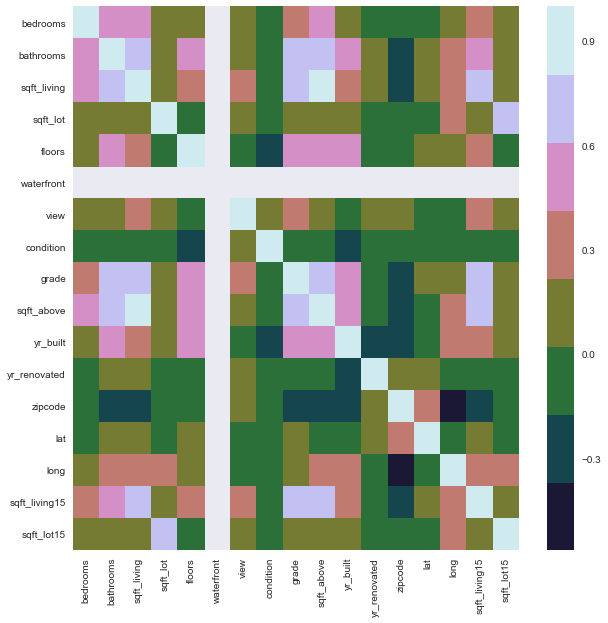

In [883]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2_pred.corr(), cmap=sns.color_palette("cubehelix", 8))

In [884]:
abs(df_pred.corr()) > 0.6

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_above,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False


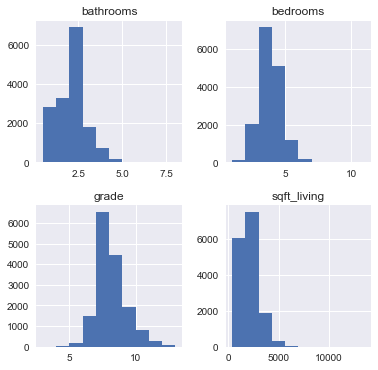

In [885]:
df_pred[["bedrooms", "bathrooms", "sqft_living", "grade"]].hist(figsize  = [6, 6]);

# Log of predictors

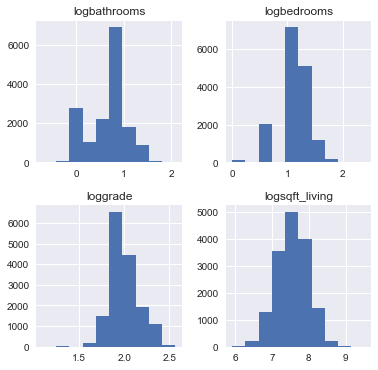

In [886]:
df_log = pd.DataFrame([])
df_log["logbedrooms"] = np.log(df_pred["bedrooms"])
df_log["logbathrooms"] = np.log(df_pred["bathrooms"])
df_log["logsqft_living"] = np.log(df_pred["sqft_living"])
df_log["loggrade"] = np.log(df_pred["grade"])
df_log.hist(figsize  = [6, 6]);

In [887]:
df_log.corr()

,logbedrooms,logbathrooms,logsqft_living,loggrade
logbedrooms,1.000000,0.538427,0.650768,0.397342
logbathrooms,0.538427,1.000000,0.761168,0.656128
logsqft_living,0.650768,0.761168,1.000000,0.746214
loggrade,0.397342,0.656128,0.746214,1.000000


# Standarization of predictors 

In [888]:
loggrade = df_log["loggrade"]
logbedrooms = df_log["logbedrooms"]
logbathrooms = df_log["logbathrooms"]
logsqft_living = df_log["logsqft_living"]


In [889]:
scaled_grade = (loggrade-np.mean(loggrade))/np.sqrt(np.var(loggrade))
scaled_bedrooms = (logbedrooms-np.mean(logbedrooms))/np.sqrt(np.var(logbedrooms))
scaled_bathrooms = (logbathrooms-np.mean(logbathrooms))/np.sqrt(np.var(logbathrooms))
scaled_sqft_living= (logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))




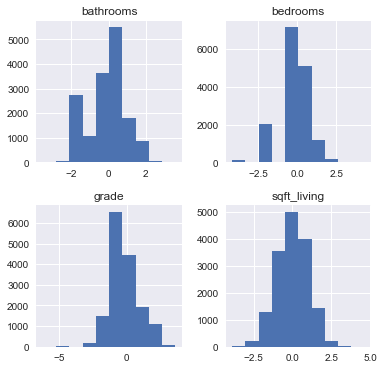

In [890]:
df_cont_scaled = pd.DataFrame([])
df_cont_scaled["grade"]= scaled_grade
df_cont_scaled["bedrooms"]= scaled_bedrooms
df_cont_scaled["bathrooms"] = scaled_bathrooms
df_cont_scaled["sqft_living"] = scaled_sqft_living

df_cont_scaled.hist(figsize  = [6, 6]);

# Min/Max scaling

In [891]:
grade = df_pred["grade"]
bedrooms = df_pred["bedrooms"]
bathrooms = df_pred["bathrooms"]
sqft_living = df_pred["sqft_living"]


In [892]:
scaled_grade = (grade-min(grade))/(max(grade)-min(grade))
scaled_bedrooms = (bedrooms-min(bedrooms))/(max(bedrooms)-min(bedrooms))
scaled_bathrooms = (bathrooms-min(bathrooms))/(max(bathrooms)-min(bathrooms))
scaled_sqft_living= (sqft_living-min(sqft_living))/(max(sqft_living)-min(sqft_living))

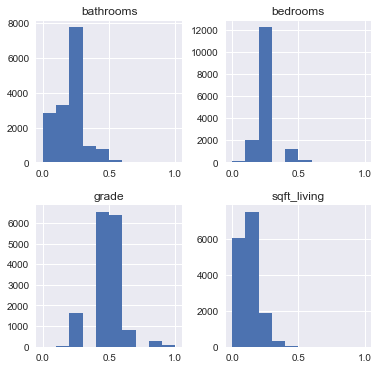

In [893]:
df_cont_scaled = pd.DataFrame([])
df_cont_scaled["grade"]= scaled_grade
df_cont_scaled["bedrooms"]= scaled_bedrooms
df_cont_scaled["bathrooms"] = scaled_bathrooms
df_cont_scaled["sqft_living"] = scaled_sqft_living

df_cont_scaled.hist(figsize  = [6, 6]);

# Mean normilization 

In [894]:
loggrade = df_log["loggrade"]
logbedrooms = df_log["logbedrooms"]
logbathrooms = df_log["logbathrooms"]
logsqft_living = df_log["logsqft_living"]

In [895]:
scaled_grade = (loggrade-np.mean(loggrade))/(max(loggrade)-min(loggrade))
scaled_bedrooms = (logbedrooms-np.mean(logbedrooms))/(max(logbedrooms)-min(logbedrooms))
scaled_bathrooms = (logbathrooms-np.mean(logbathrooms))/(max(logbathrooms)-min(logbathrooms))
scaled_sqft_living= (logsqft_living-np.mean(logsqft_living))/(max(logsqft_living)-min(logsqft_living))

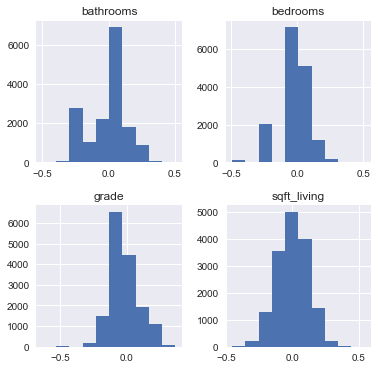

In [896]:
df_cont_scaled = pd.DataFrame([])
df_cont_scaled["grade"]= scaled_grade
df_cont_scaled["bedrooms"]= scaled_bedrooms
df_cont_scaled["bathrooms"] = scaled_bathrooms
df_cont_scaled["sqft_living"] = scaled_sqft_living

df_cont_scaled.hist(figsize  = [6, 6]);

In [897]:
size_yard = df2['sqft_lot']-df2['sqft_above']
size_yard
df2.insert(loc=idx, column='size_yard', value=size_yard)
df2.head()

,id,date,price,bedrooms,size_yard,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living
1,6414100192,12/9/2014,538000.0,3,5072,2.25,2570,7242,2.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7.851661
3,2487200875,12/9/2014,604000.0,4,3950,3.00,1960,5000,1.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7.580700
4,1954400510,2/18/2015,510000.0,3,6400,2.00,1680,8080,1.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,7.426549
5,7237550310,5/12/2014,1230000.0,4,98040,4.50,5420,101930,1.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,8.597851
6,1321400060,6/27/2014,257500.0,3,5104,2.25,1715,6819,2.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,7.447168


In [898]:
df2.dropna(axis=0, inplace=True)
df2.isnull().sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


id                 0
date               0
price              0
bedrooms           0
size_yard          0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
log_sqft_living    0
dtype: int64

Text(0.5,1,'Linearity check')

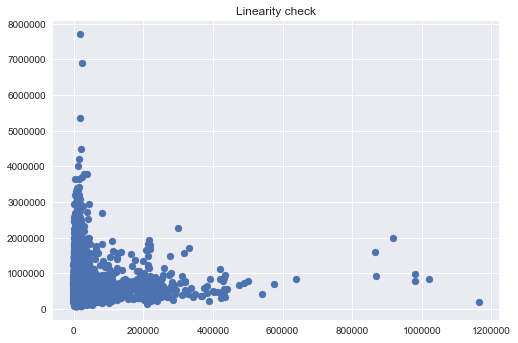

In [899]:
plt.scatter(df2.size_yard, df2.price)
plt.title("Linearity check")

In [900]:
f = 'price~size_yard'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     91.64
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.19e-21
Time:                        17:24:01   Log-Likelihood:            -2.2156e+05
No. Observations:               15640   AIC:                         4.431e+05
Df Residuals:                   15638   BIC:                         4.431e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.235e+05   2899.280    180.565      0.000    5.18e+05    5.29e+05
size_yard      0.6658      0.070      9.573      0.000       0.529       0.802
==============================================================================
Omnibus:                    13565.648   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           862215.419
Skew:                           3.860   Prob(JB):                         0.00
Kurtosis:                      38.546   Cond. No.                     4.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""